In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('employee_attrition.csv')
pd.set_option('display.max_columns', None)
data


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [12]:
data.values

array([[0.38, 0.53, 2, ..., 'sales', 'low', 1],
       [0.8, 0.86, 5, ..., 'sales', 'medium', 1],
       [0.11, 0.88, 7, ..., 'sales', 'medium', 1],
       ...,
       [0.37, 0.53, 2, ..., 'support', 'low', 1],
       [0.11, 0.96, 6, ..., 'support', 'low', 1],
       [0.37, 0.52, 2, ..., 'support', 'low', 1]], dtype=object)

In [ ]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


Categorical Variables



,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [ ]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

In [ ]:
def library(data, col1, col2, titles, estimates, col3 = None, bar = None, pie = None):
    sns.set(style = 'darkgrid')

    if col3 != None and bar == True:
        plt.figure(figsize = (12, 4))
        sns.barplot(data = data, x = col1, y = col2, hue = col3, ci = 0)
        plt.title(titles)

    elif bar == True:
        plt.figure(figsize = (10, 5))
        sns.barplot(data = data, x = col1, y = col2, ci = 0, estimator = estimates)
        plt.title(titles)

    elif pie == True:
        fig = px.pie(data_frame=data, names=col1, values=col2, hole = 0.4, height = 400, title = titles)
        fig.show()




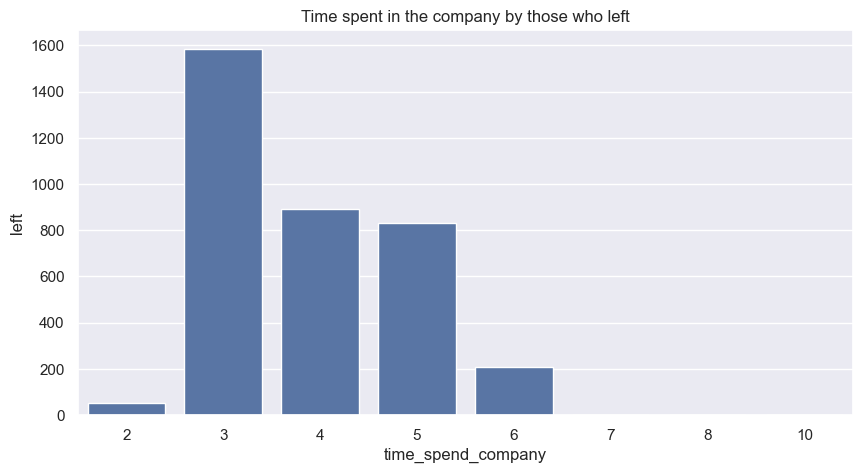

In [ ]:
library(data, 'time_spend_company', 'left', 'Time spent in the company by those who left', 'sum', bar = True)

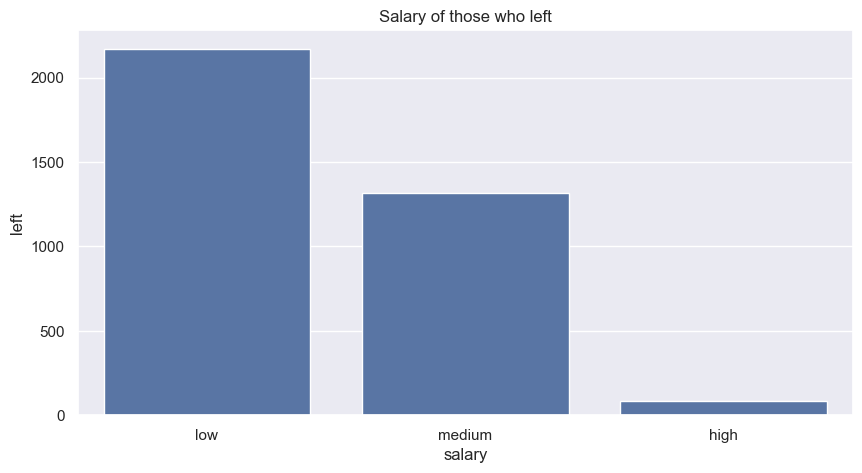

In [ ]:
library(data, 'salary', 'left', 'Salary of those who left', 'sum', bar = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for i in cat:
    if i in data:
        data[i] = label_encode.fit_transform(data[i])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1,1
14995,0.37,0.48,2,160,3,0,0,8,1,1
14996,0.37,0.53,2,143,3,0,0,8,1,1
14997,0.11,0.96,6,280,4,0,0,8,1,1


In [ ]:
department_encode  = LabelEncoder()
 

data['department'] = department_encode.fit_transform(data[['department']])
import joblib

joblib.dump(department_encode, 'department_encoder.pkl')

['department_encoder.pkl']

In [ ]:
salary_encode  = LabelEncoder()
 

data['salary'] = salary_encode.fit_transform(data[['salary']])
import joblib

joblib.dump(salary_encode, 'salary_encoder.pkl')

['salary_encoder.pkl']

In [ ]:
#serialise transformers and model
import joblib#

joblib.dump(label_encode, 'encoder.pkl')
joblib.dump(label_encode, 'employeeattrition.pkl')


['employeeattrition.pkl']

<Axes: >

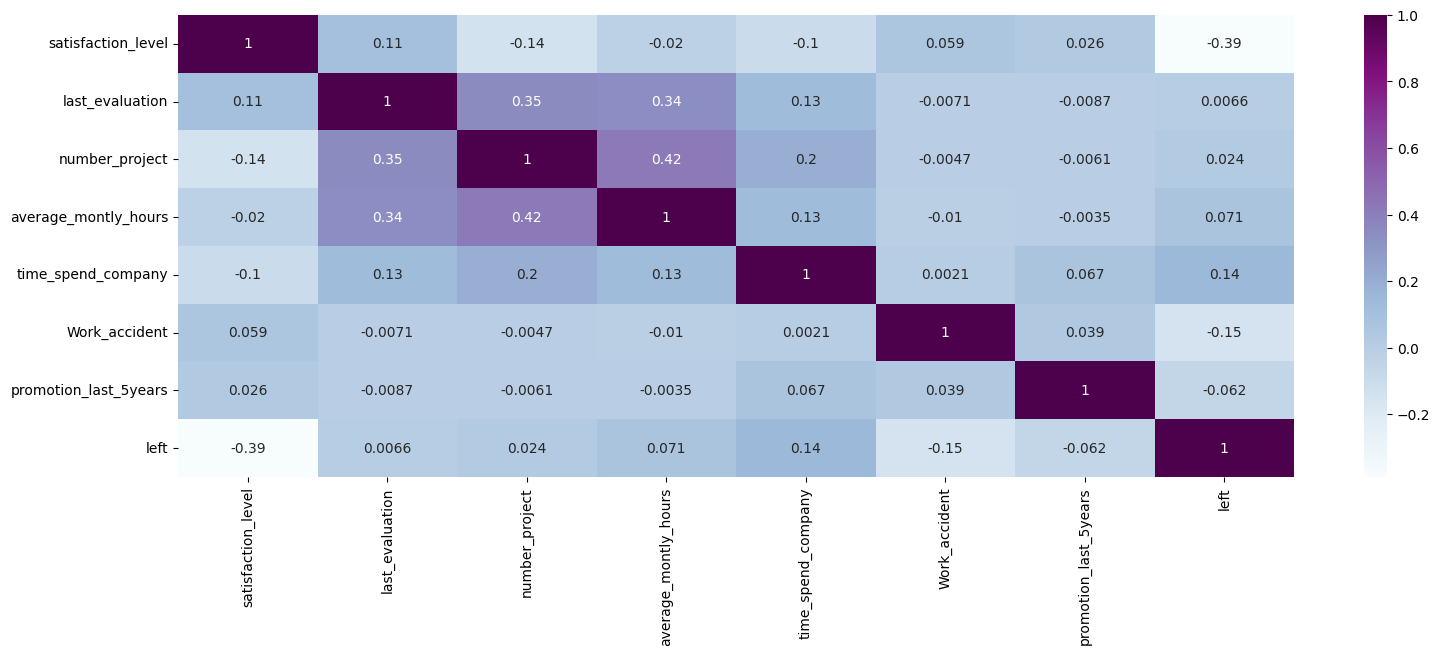

In [ ]:
plt.figure(figsize = (18, 6))
sns.heatmap(num.corr(), annot = True, cmap = 'BuPu')

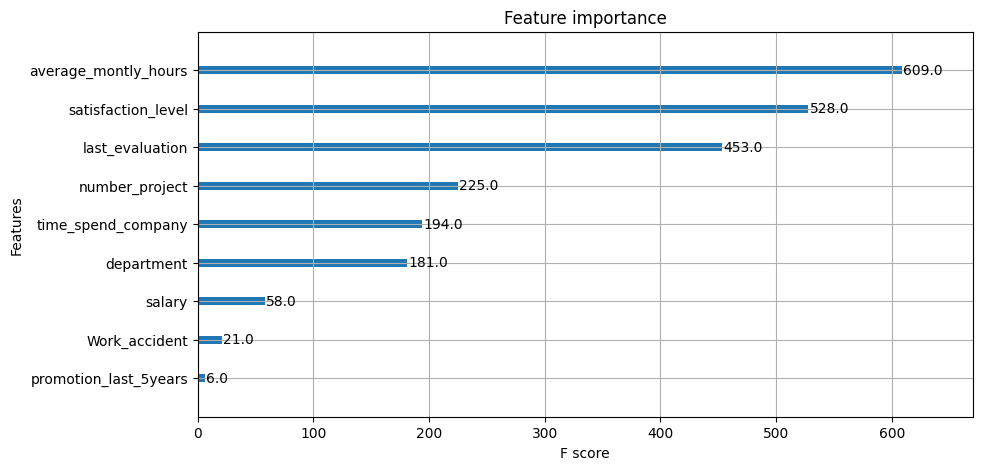

In [ ]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = data.drop('left', axis = 1)
y = data.left

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [ ]:
sel_columns = ['average_montly_hours', 'satisfaction_level', 'last_evaluation', 'number_project',
 'time_spend_company', 'department', 'salary', 'left']

sel_data = data[sel_columns]
sel_data

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,department,salary,left
0,157,0.38,0.53,2,3,7,1,1
1,262,0.80,0.86,5,6,7,2,1
2,272,0.11,0.88,7,4,7,2,1
3,223,0.72,0.87,5,5,7,1,1
4,159,0.37,0.52,2,3,7,1,1
...,...,...,...,...,...,...,...,...
14994,151,0.40,0.57,2,3,8,1,1
14995,160,0.37,0.48,2,3,8,1,1
14996,143,0.37,0.53,2,3,8,1,1
14997,280,0.11,0.96,6,4,8,1,1


<Axes: xlabel='left', ylabel='count'>

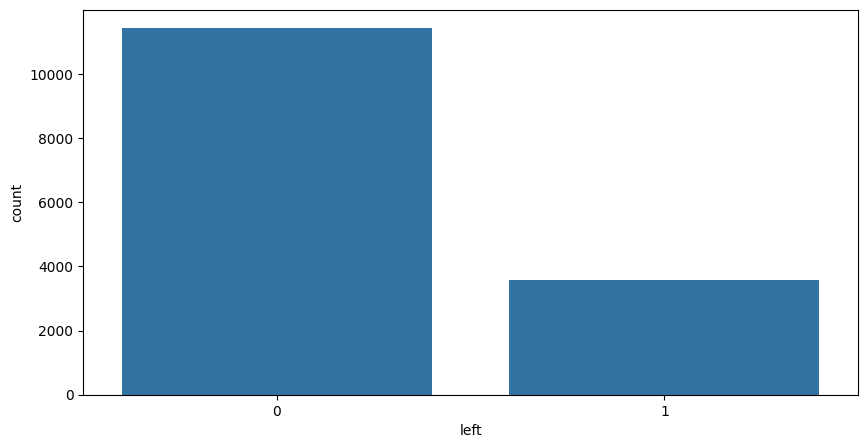

In [ ]:
sns.countplot(x = data.left)

In [ ]:
x = sel_data.drop('left', axis = 1)
y = sel_data.left

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 95, stratify = y)

In [ ]:
full_data = pd.concat([xtrain, ytrain], axis = 1)

class_0 = full_data.loc[full_data['left'] == 0]
class_1 = full_data.loc[full_data['left'] == 1]

print(f'Class of Zero shape: {class_0.shape}\nClass of One shape: {class_1.shape}')


Class of Zero shape: (9142, 8)
Class of One shape: (2857, 8)


In [ ]:
new_class0 = class_0.sample(2800)
new_class0.shape

(2800, 8)

(5657, 8)


<Axes: xlabel='left', ylabel='count'>

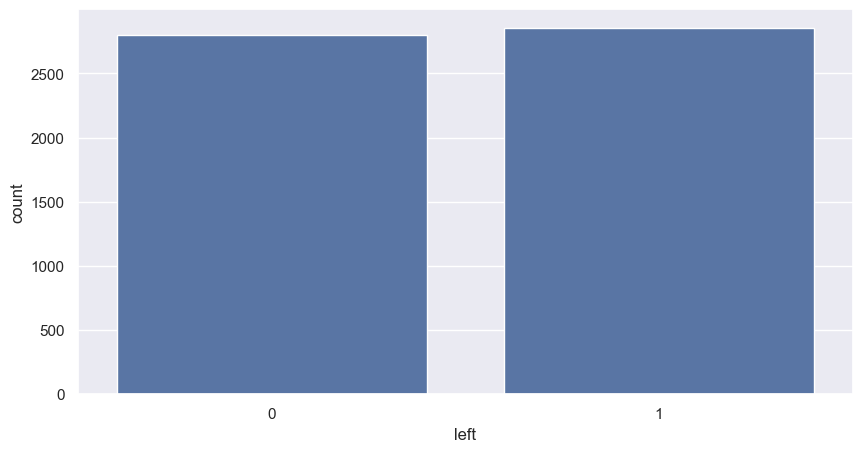

In [ ]:
new_balanced_data = pd.concat([class_1, new_class0], axis = 0) # -------- Join the data together
print(new_balanced_data.shape)

sns.set(style = 'darkgrid')
sns.countplot(x = new_balanced_data['left'])

In [ ]:
new_balanced_data

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,department,salary,left
1277,267,0.78,1.00,4,5,9,2,1
1560,286,0.09,0.83,6,4,3,1,1
12030,294,0.09,0.62,6,4,2,1,1
1794,159,0.38,0.51,2,3,9,1,1
12705,152,0.45,0.54,2,3,7,1,1
...,...,...,...,...,...,...,...,...
11447,168,0.52,0.52,4,3,6,2,0
7715,210,0.30,0.53,3,6,5,2,0
13359,179,0.72,0.53,3,3,8,1,0
4008,198,0.69,0.99,3,2,9,2,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split

x = sel_data.drop('left', axis = 1)
y = sel_data.left

#To Split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.90, random_state = 50)
print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))

xtrain: (13499, 7)
xtest: (1500, 7)
ytrain: (13499,)
ytest: (1500,)


In [ ]:
train = pd.concat([xtrain, ytrain], axis = 1)
test = pd.concat([xtest, ytest], axis = 1)

print(f'Train Set')
display(train.head())

print(f'\n\nTest Set')
display(test.head())

Train Set


,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,department,salary,left
10513,268,0.66,0.90,4,3,9,2,0
5132,149,0.97,0.52,5,3,7,2,0
14415,254,0.87,0.90,5,6,8,1,1
7401,228,0.94,0.80,4,2,1,1,0
4557,142,0.52,0.77,3,2,8,1,0




Test Set


,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,department,salary,left
5532,157,0.58,0.88,3,4,9,1,0
3341,218,0.64,0.95,3,2,9,2,0
8587,203,0.94,0.84,5,3,9,1,0
3357,180,0.71,0.69,4,3,1,2,0
3573,266,0.76,0.72,4,3,0,2,0


              precision    recall  f1-score   support

           0       0.93      0.80      0.86     10588
           1       0.26      0.52      0.34      1411

    accuracy                           0.77     11999
   macro avg       0.59      0.66      0.60     11999
weighted avg       0.85      0.77      0.80     11999



<Axes: >

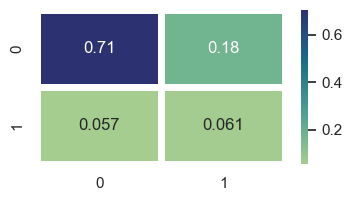

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression() # ----------------------------------------------- Instantiate the algorithm

log_reg.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to create a model
cross_validation = log_reg.predict(xtrain) # ----------------------------------------- Cros validate the model
print(classification_report(cross_validation, ytrain)) # ----------------------------- View the classification metrics of the model

revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



<Axes: >

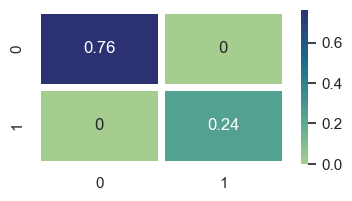

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()

rand_model.fit(xtrain, ytrain)

cross_validation = rand_model.predict(xtrain)
print(classification_report(cross_validation, ytrain))

revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [ ]:
# serialise transformers and model
import joblib

joblib.dump(rand_model, 'employeeattrition.pkl')


['employeeattrition.pkl']

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1146
           1       0.97      0.99      0.98       354

    accuracy                           0.99      1500
   macro avg       0.98      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



<Axes: >

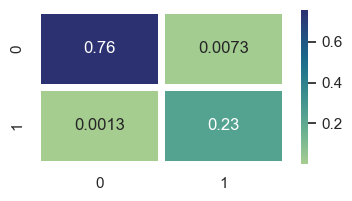

In [ ]:
# Check For Overfitting

test_prediction = rand_model.predict(xtest)
print(classification_report(test_prediction, ytest))

revealer = confusion_matrix(test_prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [ ]:
import joblib
imported_model = joblib. load('employeeattrition.pkl')
imported_model

RandomForestClassifier()